In [1]:
# 1. 라이브러리 설치 (없으면 실행)
# !pip install shap

import pandas as pd
import numpy as np
import shap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# 2. 데이터 로드 및 학습
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 (튜닝 없이 빠르게)
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

print("✅ 모델 학습 완료! 이제 SHAP으로 뜯어봅시다.")

C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ 모델 학습 완료! 이제 SHAP으로 뜯어봅시다.


In [ ]:
# 1. SHAP Explainer 생성 (트리 모델 전용 해석기)
explainer = shap.TreeExplainer(model)

# 2. SHAP 값 계산 (테스트 데이터에 대해)
shap_values = explainer.shap_values(X_test)

print(f"✅ SHAP 값 계산 완료: {shap_values.shape}")
# (데이터 개수, 특성 개수) 형태

✅ SHAP 값 계산 완료: (4128, 8)


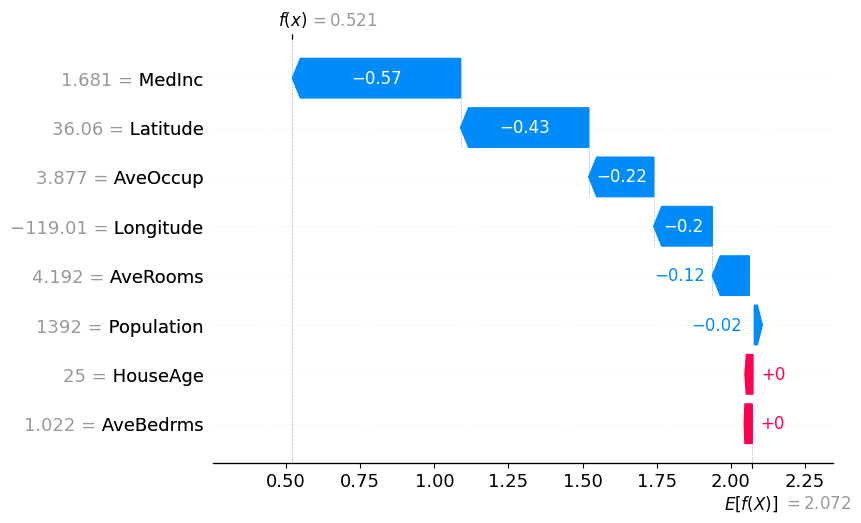

In [3]:
# Javascript 시각화 초기화 (주피터 노트북용)
shap.initjs()

# 첫 번째 데이터(X_test.iloc[0])에 대한 분석
# base_value: 모델의 평균 예측값 (기본 점수)
# f(x): 이 집의 최종 예측값
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))

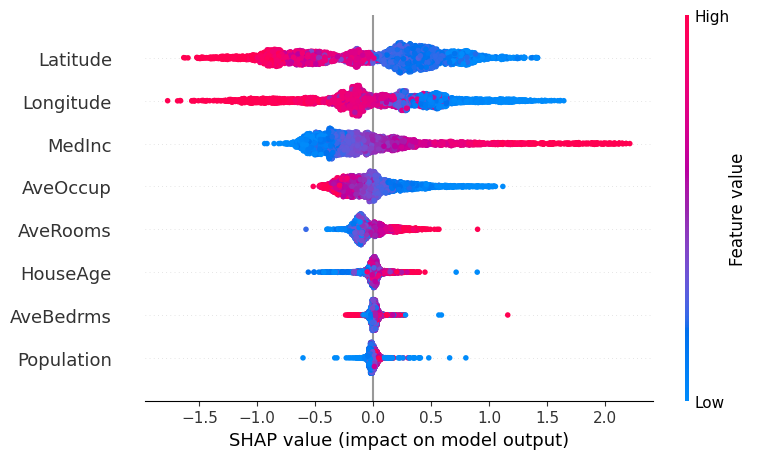

In [4]:
shap.summary_plot(shap_values, X_test)

오늘의 분석 시나리오:

목표: **"소비 패턴(식비, 교육비, 유흥비 등)"**을 보고, 그 동네의 **"월 평균 소득(부촌 여부)"**을 맞추는 AI를 만듭니다.

SHAP 질문:

1. AI는 어떤 지출 항목을 보고 소득이 높다고 판단했을까? (교육비? 유흥비?)

2. 특정 동네(예: 강남구 압구정동 vs 노원구 상계동)는 왜 소득 예측값이 다르게 나왔을까?

In [20]:
import pandas as pd
import numpy as np
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


# 1. 데이터 로드 (한글 깨짐 방지: encoding='cp949' 또는 'euc-kr')
file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\서울시 상권분석서비스(소득소비-행정동).csv"

df = pd.read_csv(file_path, encoding='cp949')

# 2. 데이터 확인
print(f"데이터 크기: {df.shape}")
print("컬럼 목록:", df.columns.tolist())

# 3. 필요한 데이터만 선택
# 타겟(y): 월_평균_소득_금액
# 특성(X): 식료품 ~ 기타_지출_총금액 (지출 관련 컬럼들)

# 지출 관련 컬럼만 자동으로 뽑기 ('지출_총금액'으로 끝나는 것들)
# 단, '지출_총금액' 자체는 정답과 너무 비슷할 수 있으므로 제외하거나 포함 여부 결정
# 여기서는 세부 항목(식료품, 의류 등)만 사용하여 예측해봅니다.

features = [col for col in df.columns if '지출_총금액' in col and col != '지출_총금액']
target = '월_평균_소득_금액'

# X, y 데이터셋 생성
X = df[features]
y = df[target]

# 4. 학습/평가 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n학습 데이터: {X_train.shape}")
X_train.head()

데이터 크기: (11475, 16)
컬럼 목록: ['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액', '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액', '기타_지출_총금액', '음식_지출_총금액']

학습 데이터: (9180, 10)


,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
1731,649095000,40126000,105479000,378786000,85286000,301903000,42770000,264943000,211542000,639186000
3827,3328963000,211390000,577912000,3816475000,171609000,309727000,669789000,894656000,350637000,3159706000
7362,3087968000,2426411000,820319000,3347756000,536150000,269903000,618432000,5306237000,910893000,6209274000
11171,871676000,65310000,137939000,978227000,1219296000,146577000,363231000,331482000,112861000,1415000000
7589,2207932000,358998000,127504000,651417000,537102000,89006000,228142000,471417000,278112000,3366111000


In [21]:
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"모델 설명력(R2): {score:.4f}")

모델 설명력(R2): 0.8699
